In [41]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve, auc

from sklearn.linear_model import LogisticRegression


from sklearn import set_config
set_config(transform_output="pandas")

# Set random seed 
RSEED = 42

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv("./df_diabetes.csv", encoding="utf-8")
df.head()


,pregnancies,Age,bmi,pedigree_f,outcome,skinthickness,insulin,glucose,bloodpressure
0,6,50,33.6,1,1,35,0,148,72
1,1,31,26.6,0,0,29,0,85,66
2,8,32,23.3,1,1,0,0,183,64
3,1,21,28.1,0,0,23,94,89,66
4,0,33,43.1,2,1,35,168,137,40


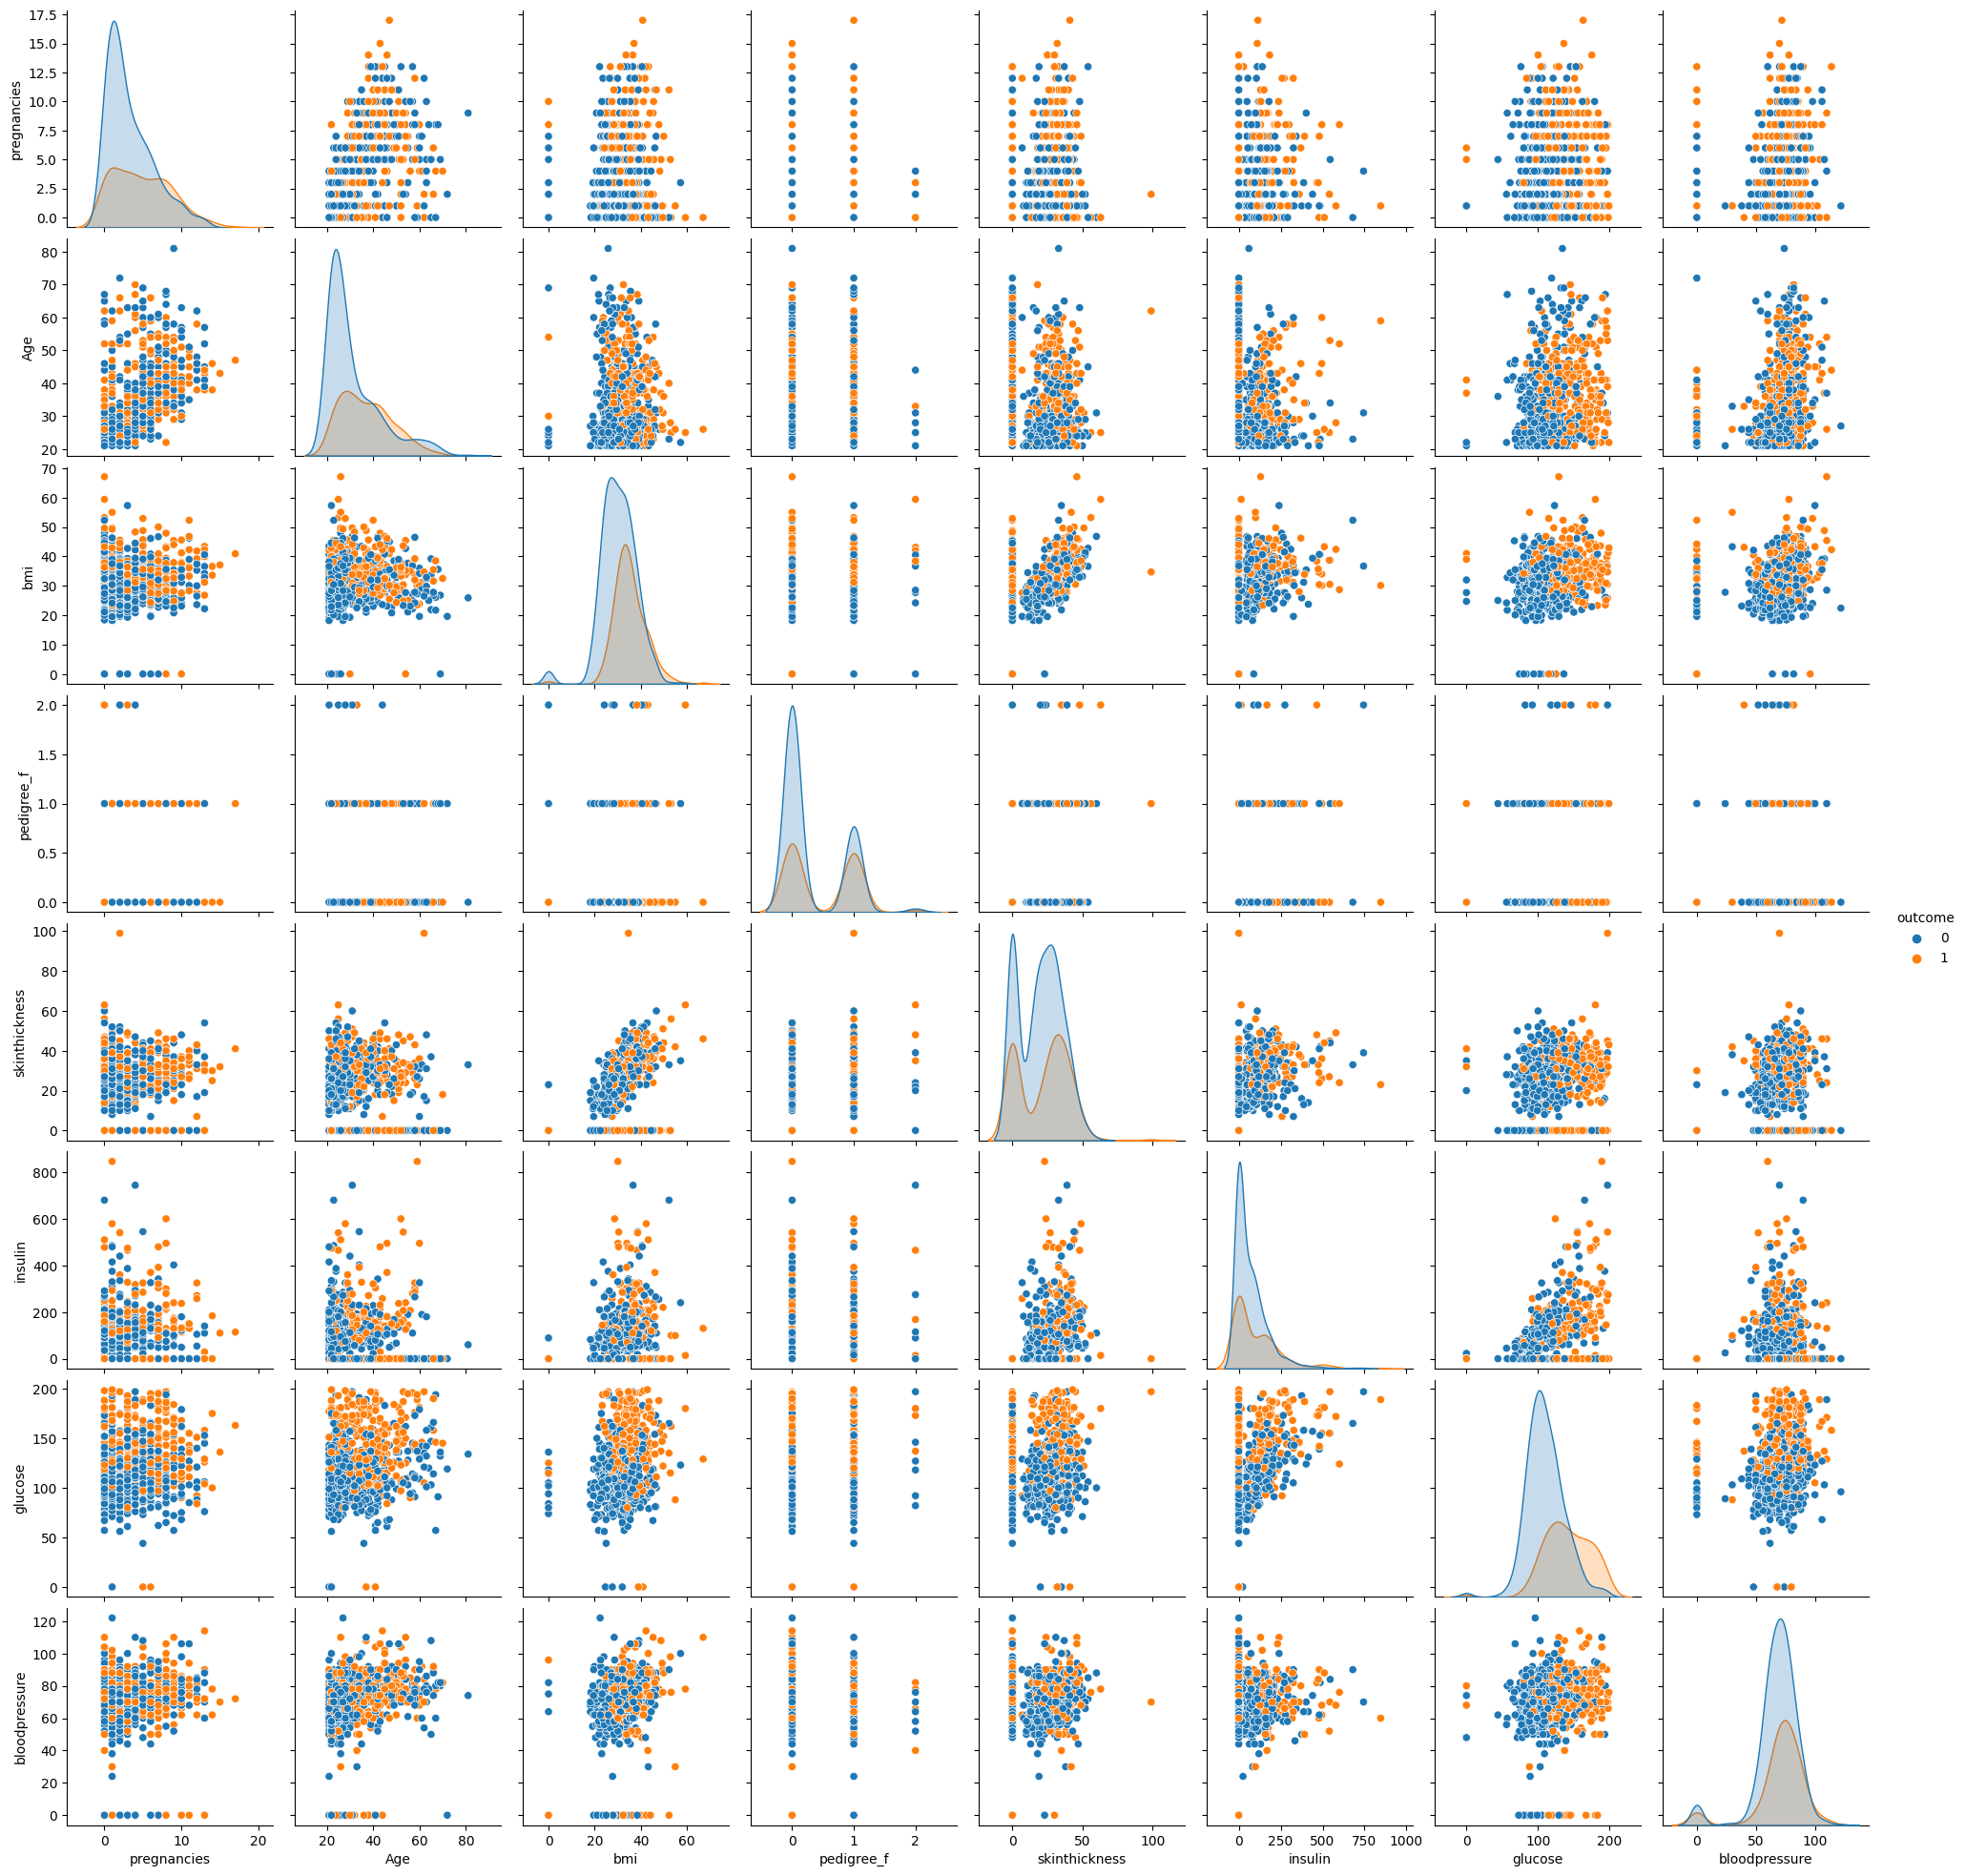

In [33]:
sns.pairplot(df, hue='outcome', diag_kind="kde")

# Modelling:

In [3]:
# Defining X and y

X = df.drop('outcome', axis=1)
y = df['outcome']

# Splitting the dataset, stratify on target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=df.outcome)

# Check the shape of the data sets
print("X_train:", X_train.shape)  
print("y_train:", y_train.shape)   
print("X_test:", X_test.shape)  
print("y_test:", y_test.shape)     

X_train: (537, 8)
y_train: (537,)
X_test: (231, 8)
y_test: (231,)


In [16]:
print("Proportion of values in training data:",y_train.value_counts(normalize=True))
print("Proportion of values in test data:",y_test.value_counts(normalize=True))


Proportion of values in training data: outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64
Proportion of values in test data: outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


## Preprocessing Pipeline
No categorical column found. No need categorical pipeline. Also, no null values found and there is no need for imputation

In [17]:


num_pipeline = Pipeline([
    ('num_scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num_processor', num_pipeline, ['Age','bmi','skinthickness','insulin','glucose','bloodpressure'])
])

preprocessor

ColumnTransformer(transformers=[('num_processor',
                                 Pipeline(steps=[('num_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'bmi', 'skinthickness', 'insulin',
                                  'glucose', 'bloodpressure'])])

In [18]:
preprocessor.fit_transform(X_train)

,num_processor__Age,num_processor__bmi,num_processor__skinthickness,num_processor__insulin,num_processor__glucose,num_processor__bloodpressure
209,0.632129,0.431483,0.812564,-0.722392,2.017945,0.780670
176,0.716992,-0.119832,-1.316902,-0.722392,-1.148619,0.465388
147,0.038086,-0.209581,0.941623,0.373154,-0.476923,-0.270269
454,-0.810548,0.726372,0.489918,0.244266,-0.668836,-0.795739
636,1.226172,-0.427543,-1.316902,-0.722392,-0.540894,0.255200
...,...,...,...,...,...,...
214,0.207812,0.264806,0.748035,0.888705,-0.285010,0.675576
113,-0.725684,0.239163,-1.316902,-0.722392,-1.436488,-0.375363
556,-0.301368,0.764836,1.264269,-0.722392,-0.764793,0.045012
759,2.753712,0.431483,-1.316902,-0.722392,2.209858,1.201045


## Training the model using logistic regression pipeline

In [20]:

l_regression_pipe = Pipeline([
    ('feature_engineering', preprocessor),
    ('logistic_regression', LogisticRegression(class_weight='balanced', max_iter=1000))

])

l_regression_pipe

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'bmi',
                                                   'skinthickness', 'insulin',
                                                   'glucose',
                                                   'bloodpressure'])])),
                ('logistic_regression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [22]:
y_train_predicted = cross_val_predict(l_regression_pipe, X_train, y_train, cv=10, n_jobs=-1)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [23]:
# Calculating the accuracy for the LogisticRegression Classifier 
print('Cross validation scores:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_train, y_train_predicted)))
print("Recall: {:.2f}".format(recall_score(y_train, y_train_predicted)))
print("Precision: {:.2f}".format(precision_score(y_train, y_train_predicted)))

Cross validation scores:
-------------------------
Accuracy: 0.73
Recall: 0.69
Precision: 0.60


## Improving the model using Gridsearch:

In [9]:
l_regression_pipe.get_params()

{'memory': None,
 'steps': [('feature_engineering',
   ColumnTransformer(transformers=[('num_processor',
                                    Pipeline(steps=[('num_scaler',
                                                     StandardScaler())]),
                                    ['Age', 'bmi', 'skinthickness', 'insulin',
                                     'glucose', 'bloodpressure'])])),
  ('logistic_regression',
   LogisticRegression(class_weight='balanced', max_iter=1000))],
 'verbose': False,
 'feature_engineering': ColumnTransformer(transformers=[('num_processor',
                                  Pipeline(steps=[('num_scaler',
                                                   StandardScaler())]),
                                  ['Age', 'bmi', 'skinthickness', 'insulin',
                                   'glucose', 'bloodpressure'])]),
 'logistic_regression': LogisticRegression(class_weight='balanced', max_iter=1000),
 'feature_engineering__n_jobs': None,
 'feature_engineer

In [34]:
param_logreg = {'logistic_regression__penalty':('l1','l2', 'none'),
                'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'logistic_regression__solver': ['liblinear', 'newton-cg', 'lbfgs','sag','saga'],
                'logistic_regression__max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                'logistic_regression__class_weight': [None, 'balanced'],
                'logistic_regression__random_state': [42]

               }

rand_grid_logreg = RandomizedSearchCV(l_regression_pipe, param_logreg, n_iter=200, cv=5, scoring="recall")
rand_grid_logreg

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('feature_engineering',
                                              ColumnTransformer(transformers=[('num_processor',
                                                                               Pipeline(steps=[('num_scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'bmi',
                                                                                'skinthickness',
                                                                                'insulin',
                                                                                'glucose',
                                                                                'bloodpressure'])])),
                                             ('logistic_regression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000))]),
                   n_iter=200,
                   param_distrib...sion__C': [0.001, 0.01,
                                                                   0.1, 1, 10,
                                                                   100],
                                        'logistic_regression__class_weight': [None,
                                                                              'balanced'],
                                        'logistic_regression__max_iter': [100,
                                                                          200,
                                                                          300,
                                                                          400,
                                                                          500,
                                                                          600,
                                                                          700,
                                                                          800,
                                                                          900,
                                                                          1000],
                                        'logistic_regression__penalty': ('l1',
                                                                         'l2',
                                                                         'none'),
                                        'logistic_regression__random_state': [42],
                                        'logistic_regression__solver': ['liblinear',
                                                                        'newton-cg',
                                                                        'lbfgs',
                                                                        'sag',
                                                                        'saga']},
                   scoring='recall')

In [35]:
# we fit the grid_logreg on train data
rand_grid_logreg.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('feature_engineering',
                                              ColumnTransformer(transformers=[('num_processor',
                                                                               Pipeline(steps=[('num_scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'bmi',
                                                                                'skinthickness',
                                                                                'insulin',
                                                                                'glucose',
                                                                                'bloodpressure'])])),
                                             ('logistic_regression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000))]),
                   n_iter=200,
                   param_distrib...sion__C': [0.001, 0.01,
                                                                   0.1, 1, 10,
                                                                   100],
                                        'logistic_regression__class_weight': [None,
                                                                              'balanced'],
                                        'logistic_regression__max_iter': [100,
                                                                          200,
                                                                          300,
                                                                          400,
                                                                          500,
                                                                          600,
                                                                          700,
                                                                          800,
                                                                          900,
                                                                          1000],
                                        'logistic_regression__penalty': ('l1',
                                                                         'l2',
                                                                         'none'),
                                        'logistic_regression__random_state': [42],
                                        'logistic_regression__solver': ['liblinear',
                                                                        'newton-cg',
                                                                        'lbfgs',
                                                                        'sag',
                                                                        'saga']},
                   scoring='recall')

In [36]:
# Show best parameters
print('Best score:\n{:.2f}'.format(rand_grid_logreg.best_score_))
print("Best parameters:\n{}".format(rand_grid_logreg.best_params_))

Best score:
0.73
Best parameters:
{'logistic_regression__solver': 'liblinear', 'logistic_regression__random_state': 42, 'logistic_regression__penalty': 'l2', 'logistic_regression__max_iter': 500, 'logistic_regression__class_weight': 'balanced', 'logistic_regression__C': 0.001}


In [37]:
best_model = rand_grid_logreg.best_estimator_
best_model

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'bmi',
                                                   'skinthickness', 'insulin',
                                                   'glucose',
                                                   'bloodpressure'])])),
                ('logistic_regression',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    max_iter=500, random_state=42,
                                    solver='liblinear'))])

## Final Evaluation

In [38]:
y_test_predicted = best_model.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_test_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_test_predicted)))
print("Precision: {:.2f}".format(precision_score(y_test, y_test_predicted)))

Accuracy: 0.74
Recall: 0.74
Precision: 0.60


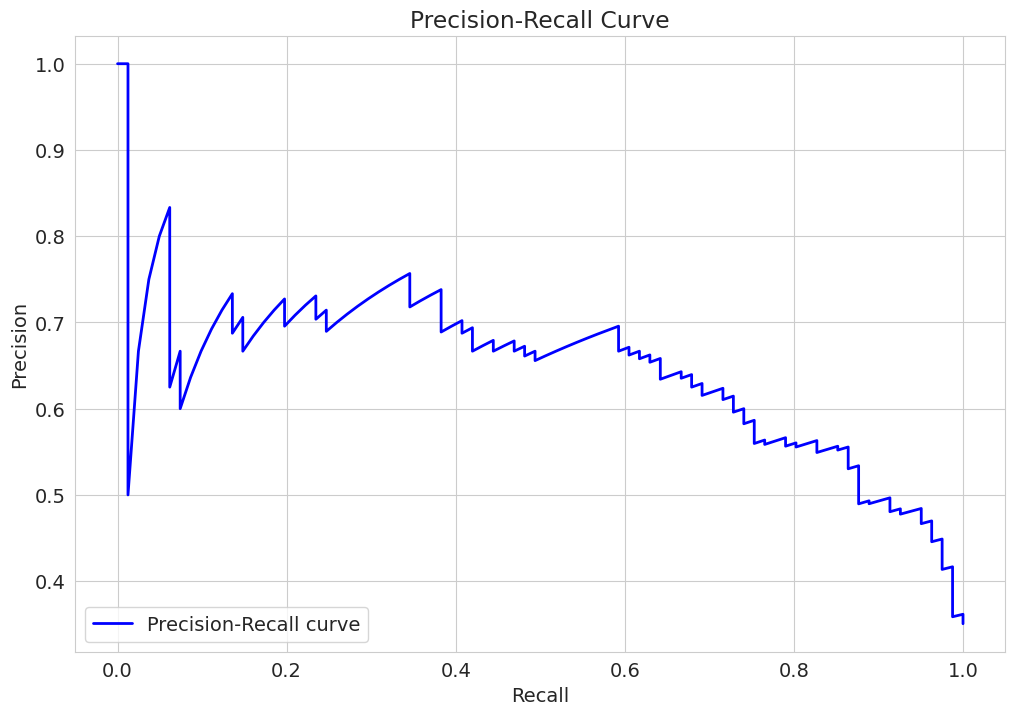

In [42]:
# Precision-Recall curve for the purpose of understanding the tradeoff between precision and recall: 

y_scores = best_model.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
area_under_curve = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, 'b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()




The most promising keys to improving recall without compromising precision is probably the exploration of different modeling algorithms, instead of further tuning the logistic regression model, and second the tuning of features. 